## Multi-classification problem

__Note:__ you might need to do
`conda install torchvision "pillow<7"`
if torchvision is not already installed on your computer, and/or for compatibility issues (the version of torchvision version supporting the last version of Pillow is not released yet).

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split


import matplotlib.pyplot as plt

%matplotlib inline

### [MNIST Dataset](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)
* Handwritten digits with 10 classes
* the size of each image is 28x28 pixels 
* 50 000 data examples in training set, 10 000 examples in validation set, 10 000 in test set

In [3]:
# Loading MNIST dataset from torchvision.dataset
dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

In [4]:
print("The shape of the dataset is :", dataset.data.size())

The shape of the dataset is : torch.Size([60000, 28, 28])


In [5]:
# split the dataset to training and validation sets
train_set, val_set = random_split(dataset, [50000, 10000])

In [13]:
train_set[0][0].shape

torch.Size([1, 28, 28])

Text(0.5,1,'image label: 0')

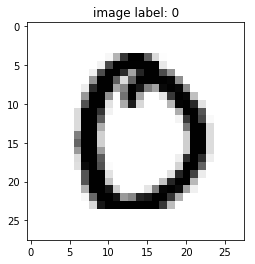

In [5]:
sample_index = 88

plt.imshow(dataset.data[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("image label: %d" % dataset.targets[sample_index])

### Training the neural network

In [6]:
class Model(nn.Module):
    
    def __init__(self,out_channels,kernel,acti):
        super(Model, self).__init__()
        self.l1 = nn.Conv2d(1,out_channels, kernel_size=kernel, padding=2)
        if kernel==3:
            coeff=30
        else :
            coeff=28
        self.linear = nn.Linear(out_channels*(coeff**2),10)
        self.acti=acti
        
    def forward(self, inputs):
        #inputs = inputs.view(batch_size, -1)
        inputs = self.l1(inputs)
        inputs = torch.flatten(inputs, 1)
        inputs = self.linear(inputs)
        outputs = self.acti(inputs)# Use softmax as the activation function for the last layer
        
        return outputs

In [7]:
class Model_2(nn.Module):
    
    def __init__(self,out_channels,kernel,acti):
        super(Model_2, self).__init__()
        self.l1 = nn.Conv2d(1,out_channels, kernel_size=kernel, padding=2)
        self.maxpool=nn.MaxPool2d(2)
            
        self.l2 = nn.Conv2d(out_channels,out_channels, kernel_size=kernel, padding=2)
        
        if kernel==3:
            coeff=17
        else :
            coeff=28
        
        self.linear = nn.Linear(out_channels*(coeff**2),10)
        self.acti=acti
        
    def forward(self, inputs):
        #inputs = inputs.view(batch_size, -1)
        inputs = self.l1(inputs)
        inputs = self.l2(self.maxpool(inputs))
        
        inputs = torch.flatten(inputs, 1)
        inputs = self.linear(inputs)
        outputs = self.acti(inputs)# Use softmax as the activation function for the last layer
        
        return outputs

In [8]:
class Model_3(nn.Module):
    
    def __init__(self,out_channels,kernel,acti):
        super(Model_3, self).__init__()
        self.l1 = nn.Conv2d(1,out_channels, kernel_size=kernel, padding=2)
        self.maxpool=nn.MaxPool2d(2)
            
        self.l2 = nn.Conv2d(out_channels,out_channels, kernel_size=kernel, padding=2)
        
        self.l3 = nn.Conv2d(out_channels,out_channels, kernel_size=kernel, padding=2)
        
        if kernel==3:
            coeff=10
        
        self.linear = nn.Linear(out_channels*(coeff**2),10)
        
        self.acti=acti
        
    def forward(self, inputs):
        #inputs = inputs.view(batch_size, -1)
        inputs = self.l1(inputs)
        inputs = self.l2(self.maxpool(inputs))

        inputs = self.l3(self.maxpool(inputs))
        
        inputs = torch.flatten(inputs, 1)
        inputs = self.linear(inputs)
        outputs = self.acti(inputs)# Use softmax as the activation function for the last layer
        
        return outputs

In [9]:
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

# Use mean squared loss function 
criterion = nn.MSELoss()

In [10]:
# define a function for training
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
    train_error = []
    train_loader = DataLoader(dataset, batch_size, shuffle=True)
    model.train()
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        for (images, labels) in train_loader:
            #print(images.shape,images.view(batch_size, -1).shape)
            
            y_pre = model(images) 
            #reshape the inputs from [N, img_shape, img_shape] to [N, img_shape*img_shape] 
            
            # One-hot encoding or labels so as to calculate MSE error:
            labels_one_hot = torch.FloatTensor(batch_size, 10)
            labels_one_hot.zero_()
            labels_one_hot.scatter_(1, labels.view(-1, 1), 1)
           
            
            loss = criterion(y_pre, labels_one_hot)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(dataset)
        train_error.append(epoch_average_loss)
        print('Epoch [{}/{}], Loss: {:.4f}'
                      .format(epoch+1, num_epochs, epoch_average_loss))
    return train_error

In [11]:
# Calculate the accuracy to evaluate the model
def accuracy(dataset, model):

    with torch.no_grad():
        correct = 0
        total = 0
        dataloader = DataLoader(dataset)
        for images, labels in dataloader:
            #images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1) 
            correct += (predicted == labels).sum()

    print('Accuracy of the model : {:.2f} %'.format(100*correct.item()/ len(dataset)))
    return( 100*correct.item()/ len(dataset))


For a kernel size of 3
Number of ouput channels for the conv layer: 4
Epoch [1/10], Loss: 0.0449
Epoch [2/10], Loss: 0.0178
Epoch [3/10], Loss: 0.0154
Epoch [4/10], Loss: 0.0145
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0134
Epoch [7/10], Loss: 0.0131
Epoch [8/10], Loss: 0.0129
Epoch [9/10], Loss: 0.0127
Epoch [10/10], Loss: 0.0125
Accuracy of the model : 91.49 %
Number of ouput channels for the conv layer: 6
Epoch [1/10], Loss: 0.0484
Epoch [2/10], Loss: 0.0183
Epoch [3/10], Loss: 0.0157
Epoch [4/10], Loss: 0.0146
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0135
Epoch [7/10], Loss: 0.0132
Epoch [8/10], Loss: 0.0129
Epoch [9/10], Loss: 0.0127
Epoch [10/10], Loss: 0.0125
Accuracy of the model : 92.18 %
Number of ouput channels for the conv layer: 8
Epoch [1/10], Loss: 0.0455
Epoch [2/10], Loss: 0.0179
Epoch [3/10], Loss: 0.0155
Epoch [4/10], Loss: 0.0145
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0134
Epoch [7/10], Loss: 0.0131
Epoch [8/10], Loss: 0.0129
Epoch [9/10],

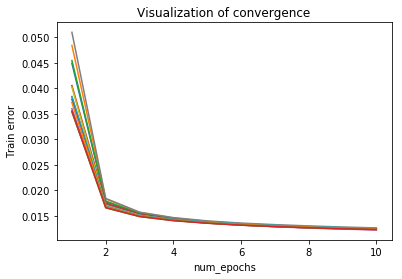

In [21]:
kernels=[3,5]
out_channels=[4,6,8,10,12,14,16]

accs=[]
for kernel in kernels:
    print('\nFor a kernel size of',kernel)
    acc=[]
    
    #Trying for different numbers of output channels
    for out_channel in out_channels:
        print("Number of ouput channels for the conv layer:",out_channel)
        model=Model(out_channel,kernel)
        # Use mean squared loss function 
        criterion = nn.MSELoss()

        # Use SGD optimizer with a learning rate of 0.01
        # It is initialized on our model
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

        train_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set)

        # plot the training error wrt. the number of epochs: 
        plt.plot(range(1, num_epochs+1), train_error)
        plt.xlabel("num_epochs")
        plt.ylabel("Train error")
        plt.title("Visualization of convergence")
        
        model.eval()
        acc.append(accuracy(val_set, model))
    accs.append(acc)

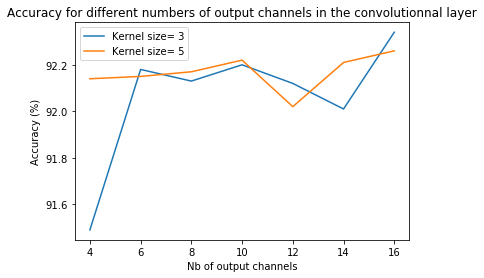

In [24]:
for i in range(len(accs)):

    plt.plot(out_channels,accs[i],label="Kernel size= "+str(kernels[i]))

    
plt.title("Accuracy for different numbers of output channels in the convolutionnal layer")
plt.xlabel('Nb of output channels')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

c:\users\alixa\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Loss: 0.0334
Epoch [2/10], Loss: 0.0168
Epoch [3/10], Loss: 0.0150
Epoch [4/10], Loss: 0.0141
Epoch [5/10], Loss: 0.0136
Epoch [6/10], Loss: 0.0132
Epoch [7/10], Loss: 0.0129
Epoch [8/10], Loss: 0.0126
Epoch [9/10], Loss: 0.0124
Epoch [10/10], Loss: 0.0123
Accuracy of the model : 92.43 %
Epoch [1/10], Loss: 0.0465
Epoch [2/10], Loss: 0.0247
Epoch [3/10], Loss: 0.0216
Epoch [4/10], Loss: 0.0203
Epoch [5/10], Loss: 0.0195
Epoch [6/10], Loss: 0.0189
Epoch [7/10], Loss: 0.0185
Epoch [8/10], Loss: 0.0182
Epoch [9/10], Loss: 0.0179
Epoch [10/10], Loss: 0.0177
Accuracy of the model : 90.99 %
Epoch [1/10], Loss: 0.0473
Epoch [2/10], Loss: 0.0438
Epoch [3/10], Loss: 0.0431
Epoch [4/10], Loss: 0.0428
Epoch [5/10], Loss: 0.0426
Epoch [6/10], Loss: 0.0424
Epoch [7/10], Loss: 0.0423
Epoch [8/10], Loss: 0.0422
Epoch [9/10], Loss: 0.0422
Epoch [10/10], Loss: 0.0421
Accuracy of the model : 84.33 %


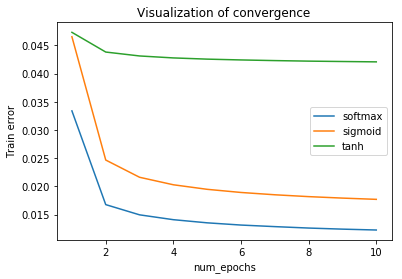

c:\users\alixa\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Loss: 0.0848
Epoch [2/10], Loss: 0.0288
Epoch [3/10], Loss: 0.0170
Epoch [4/10], Loss: 0.0156
Epoch [5/10], Loss: 0.0148
Epoch [6/10], Loss: 0.0144
Epoch [7/10], Loss: 0.0140
Epoch [8/10], Loss: 0.0137
Epoch [9/10], Loss: 0.0135
Epoch [10/10], Loss: 0.0133
Accuracy of the model : 91.93 %
Epoch [1/10], Loss: 0.0657
Epoch [2/10], Loss: 0.0267
Epoch [3/10], Loss: 0.0223
Epoch [4/10], Loss: 0.0208
Epoch [5/10], Loss: 0.0198
Epoch [6/10], Loss: 0.0192
Epoch [7/10], Loss: 0.0187
Epoch [8/10], Loss: 0.0183
Epoch [9/10], Loss: 0.0180
Epoch [10/10], Loss: 0.0177
Accuracy of the model : 90.86 %
Epoch [1/10], Loss: 0.0486
Epoch [2/10], Loss: 0.0398
Epoch [3/10], Loss: 0.0361
Epoch [4/10], Loss: 0.0332
Epoch [5/10], Loss: 0.0312
Epoch [6/10], Loss: 0.0298
Epoch [7/10], Loss: 0.0288
Epoch [8/10], Loss: 0.0281
Epoch [9/10], Loss: 0.0275
Epoch [10/10], Loss: 0.0271
Accuracy of the model : 94.92 %


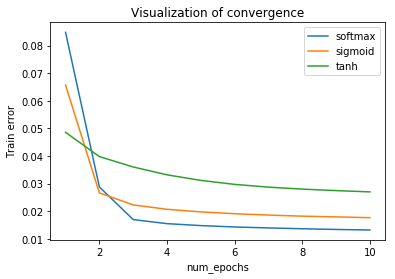

c:\users\alixa\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Loss: 0.0897
Epoch [2/10], Loss: 0.0881
Epoch [3/10], Loss: 0.0601
Epoch [4/10], Loss: 0.0218
Epoch [5/10], Loss: 0.0174
Epoch [6/10], Loss: 0.0159
Epoch [7/10], Loss: 0.0149
Epoch [8/10], Loss: 0.0140
Epoch [9/10], Loss: 0.0132
Epoch [10/10], Loss: 0.0124
Accuracy of the model : 92.43 %
Epoch [1/10], Loss: 0.0961
Epoch [2/10], Loss: 0.0880
Epoch [3/10], Loss: 0.0655
Epoch [4/10], Loss: 0.0321
Epoch [5/10], Loss: 0.0258
Epoch [6/10], Loss: 0.0235
Epoch [7/10], Loss: 0.0219
Epoch [8/10], Loss: 0.0207
Epoch [9/10], Loss: 0.0197
Epoch [10/10], Loss: 0.0187
Accuracy of the model : 90.69 %
Epoch [1/10], Loss: 0.0583
Epoch [2/10], Loss: 0.0425
Epoch [3/10], Loss: 0.0361
Epoch [4/10], Loss: 0.0320
Epoch [5/10], Loss: 0.0297
Epoch [6/10], Loss: 0.0282
Epoch [7/10], Loss: 0.0272
Epoch [8/10], Loss: 0.0265
Epoch [9/10], Loss: 0.0260
Epoch [10/10], Loss: 0.0255
Accuracy of the model : 95.09 %


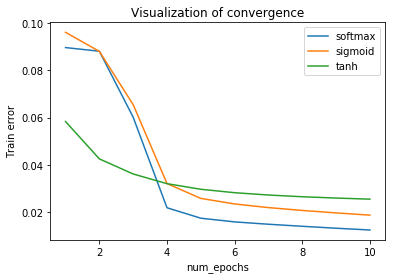

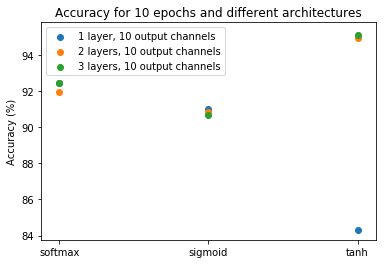

In [68]:
import numpy as np 

# Choose the hyperparameters for training: 
num_epochs = 10

models_names=['1 layer, 10 output channels','2 layers, 10 output channels','3 layers, 10 output channels']
models=[Model,Model_2,Model_3]

acti_names=["softmax","sigmoid","tanh"]
acti=[F.softmax,torch.sigmoid,torch.tanh]

acc=[]

for mod in models:
    acc_mod=[]
    for i in range(len(acti)):
        activation=acti[i]
        
        model=mod(10,3,activation)
        
        criterion = nn.MSELoss()

        # Use SGD optimizer with a learning rate of 0.01
        # It is initialized on our model
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

        train_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set)

        # plot the training error wrt. the number of epochs: 
        plt.plot(range(1, num_epochs+1), train_error, label=acti_names[i])
        plt.xlabel("num_epochs")
        plt.ylabel("Train error")
        plt.title("Visualization of convergence")


        model.eval()
        acc_mod.append(accuracy(val_set, model))
    plt.legend()
    plt.show()
    
    acc.append(acc_mod)

# Figure for the accuracy
for i in range(len(acc)):
    plt.scatter(np.arange(len(acti)),acc[i],label=models_names[i])
    
plt.title("Accuracy for 10 epochs and different architectures")
plt.xticks(np.arange(len(acti)), acti_names)
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

Epoch [1/10], Loss: 0.0875
Epoch [2/10], Loss: 0.0777
Epoch [3/10], Loss: 0.0676
Epoch [4/10], Loss: 0.0606
Epoch [5/10], Loss: 0.0569
Epoch [6/10], Loss: 0.0546
Epoch [7/10], Loss: 0.0529
Epoch [8/10], Loss: 0.0516
Epoch [9/10], Loss: 0.0506
Epoch [10/10], Loss: 0.0497
Accuracy of the model : 82.07 %
Epoch [1/10], Loss: 0.0936
Epoch [2/10], Loss: 0.0902
Epoch [3/10], Loss: 0.0898
Epoch [4/10], Loss: 0.0896
Epoch [5/10], Loss: 0.0894
Epoch [6/10], Loss: 0.0893
Epoch [7/10], Loss: 0.0891
Epoch [8/10], Loss: 0.0889
Epoch [9/10], Loss: 0.0887
Epoch [10/10], Loss: 0.0884
Accuracy of the model : 29.05 %
Epoch [1/10], Loss: 0.0687
Epoch [2/10], Loss: 0.0482
Epoch [3/10], Loss: 0.0419
Epoch [4/10], Loss: 0.0377
Epoch [5/10], Loss: 0.0352
Epoch [6/10], Loss: 0.0338
Epoch [7/10], Loss: 0.0328
Epoch [8/10], Loss: 0.0320
Epoch [9/10], Loss: 0.0315
Epoch [10/10], Loss: 0.0310
Accuracy of the model : 92.36 %
Epoch [1/10], Loss: 0.0895
Epoch [2/10], Loss: 0.0837
Epoch [3/10], Loss: 0.0695
Epoch [4/1

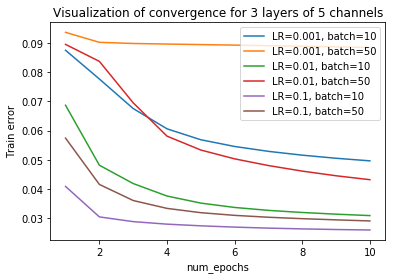

Epoch [1/10], Loss: 0.0876
Epoch [2/10], Loss: 0.0801
Epoch [3/10], Loss: 0.0690
Epoch [4/10], Loss: 0.0607
Epoch [5/10], Loss: 0.0563
Epoch [6/10], Loss: 0.0532
Epoch [7/10], Loss: 0.0511
Epoch [8/10], Loss: 0.0497
Epoch [9/10], Loss: 0.0486
Epoch [10/10], Loss: 0.0477
Accuracy of the model : 83.88 %
Epoch [1/10], Loss: 0.0931
Epoch [2/10], Loss: 0.0894
Epoch [3/10], Loss: 0.0887
Epoch [4/10], Loss: 0.0880
Epoch [5/10], Loss: 0.0873
Epoch [6/10], Loss: 0.0865
Epoch [7/10], Loss: 0.0856
Epoch [8/10], Loss: 0.0846
Epoch [9/10], Loss: 0.0834
Epoch [10/10], Loss: 0.0820
Accuracy of the model : 47.58 %
Epoch [1/10], Loss: 0.0613
Epoch [2/10], Loss: 0.0426
Epoch [3/10], Loss: 0.0366
Epoch [4/10], Loss: 0.0329
Epoch [5/10], Loss: 0.0307
Epoch [6/10], Loss: 0.0291
Epoch [7/10], Loss: 0.0279
Epoch [8/10], Loss: 0.0270
Epoch [9/10], Loss: 0.0263
Epoch [10/10], Loss: 0.0258
Accuracy of the model : 94.89 %
Epoch [1/10], Loss: 0.0811
Epoch [2/10], Loss: 0.0595
Epoch [3/10], Loss: 0.0519
Epoch [4/1

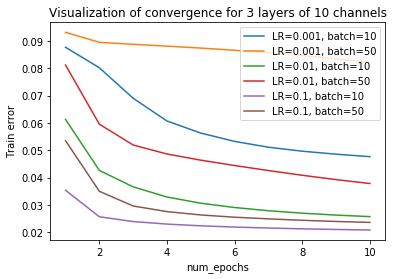

Epoch [1/10], Loss: 0.0856
Epoch [2/10], Loss: 0.0720
Epoch [3/10], Loss: 0.0587
Epoch [4/10], Loss: 0.0526
Epoch [5/10], Loss: 0.0494
Epoch [6/10], Loss: 0.0473
Epoch [7/10], Loss: 0.0457
Epoch [8/10], Loss: 0.0443
Epoch [9/10], Loss: 0.0430
Epoch [10/10], Loss: 0.0418
Accuracy of the model : 87.26 %
Epoch [1/10], Loss: 0.0895
Epoch [2/10], Loss: 0.0858
Epoch [3/10], Loss: 0.0837
Epoch [4/10], Loss: 0.0813
Epoch [5/10], Loss: 0.0787
Epoch [6/10], Loss: 0.0758
Epoch [7/10], Loss: 0.0729
Epoch [8/10], Loss: 0.0699
Epoch [9/10], Loss: 0.0672
Epoch [10/10], Loss: 0.0646
Accuracy of the model : 68.43 %
Epoch [1/10], Loss: 0.0541
Epoch [2/10], Loss: 0.0377
Epoch [3/10], Loss: 0.0316
Epoch [4/10], Loss: 0.0282
Epoch [5/10], Loss: 0.0262
Epoch [6/10], Loss: 0.0250
Epoch [7/10], Loss: 0.0241
Epoch [8/10], Loss: 0.0234
Epoch [9/10], Loss: 0.0229
Epoch [10/10], Loss: 0.0224
Accuracy of the model : 95.69 %
Epoch [1/10], Loss: 0.0770
Epoch [2/10], Loss: 0.0557
Epoch [3/10], Loss: 0.0492
Epoch [4/1

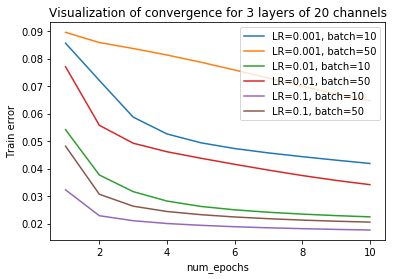

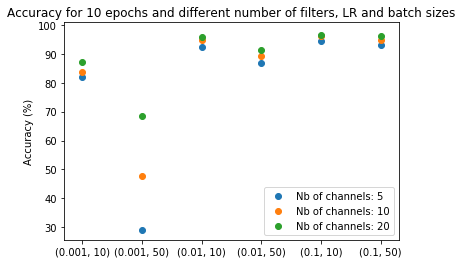

In [14]:
import numpy as np 

# Choose the hyperparameters for training: 
num_epochs = 10

output_channels=[5,10,20]

params=[(0.001,10),(0.001,50),(0.01,10),(0.01,50),(0.1,10),(0.1,50)]

acc=[]

for channels in output_channels:
    acc_mod=[]
    for (learning_rate,batch) in (params):

        model=Model_3(channels,3,torch.tanh)
        
        criterion = nn.MSELoss()

        # Use SGD optimizer with a learning rate of 0.01
        # It is initialized on our model
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        train_error = train(num_epochs, batch, criterion, optimizer, model, train_set)

        # plot the training error wrt. the number of epochs: 
        plt.plot(range(1, num_epochs+1), train_error, label="LR="+str(learning_rate)+", batch="+str(batch))
        plt.xlabel("num_epochs")
        plt.ylabel("Train error")
        plt.title("Visualization of convergence for 3 layers of "+str(channels)+" channels")


        model.eval()
        acc_mod.append(accuracy(val_set, model))
    plt.legend()
    plt.show()
    
    acc.append(acc_mod)

# Figure for the accuracy
for i in range(len(acc)):
    plt.scatter(np.arange(len(params)),acc[i],label="Nb of channels: "+str(output_channels[i]))
    
plt.title("Accuracy for 10 epochs and different number of filters, LR and batch sizes")
plt.xticks(np.arange(len(params)), params)
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

Epoch [1/20], Loss: 0.0876
Epoch [2/20], Loss: 0.0792
Epoch [3/20], Loss: 0.0680
Epoch [4/20], Loss: 0.0593
Epoch [5/20], Loss: 0.0550
Epoch [6/20], Loss: 0.0523
Epoch [7/20], Loss: 0.0504
Epoch [8/20], Loss: 0.0489
Epoch [9/20], Loss: 0.0476
Epoch [10/20], Loss: 0.0464
Epoch [11/20], Loss: 0.0454
Epoch [12/20], Loss: 0.0443
Epoch [13/20], Loss: 0.0433
Epoch [14/20], Loss: 0.0422
Epoch [15/20], Loss: 0.0412
Epoch [16/20], Loss: 0.0402
Epoch [17/20], Loss: 0.0393
Epoch [18/20], Loss: 0.0384
Epoch [19/20], Loss: 0.0375
Epoch [20/20], Loss: 0.0367
Accuracy of the model : 90.35 %
Epoch [1/20], Loss: 0.0642
Epoch [2/20], Loss: 0.0460
Epoch [3/20], Loss: 0.0407
Epoch [4/20], Loss: 0.0363
Epoch [5/20], Loss: 0.0329
Epoch [6/20], Loss: 0.0304
Epoch [7/20], Loss: 0.0286
Epoch [8/20], Loss: 0.0274
Epoch [9/20], Loss: 0.0266
Epoch [10/20], Loss: 0.0259
Epoch [11/20], Loss: 0.0253
Epoch [12/20], Loss: 0.0248
Epoch [13/20], Loss: 0.0244
Epoch [14/20], Loss: 0.0241
Epoch [15/20], Loss: 0.0237
Epoch 

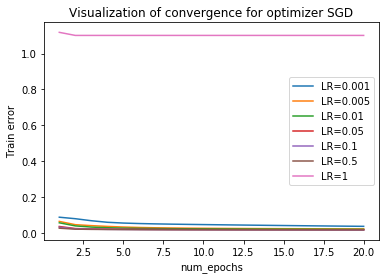

Epoch [1/20], Loss: 0.0257
Epoch [2/20], Loss: 0.0209
Epoch [3/20], Loss: 0.0198
Epoch [4/20], Loss: 0.0193
Epoch [5/20], Loss: 0.0189
Epoch [6/20], Loss: 0.0186
Epoch [7/20], Loss: 0.0184
Epoch [8/20], Loss: 0.0182
Epoch [9/20], Loss: 0.0181
Epoch [10/20], Loss: 0.0180
Epoch [11/20], Loss: 0.0179
Epoch [12/20], Loss: 0.0179
Epoch [13/20], Loss: 0.0178
Epoch [14/20], Loss: 0.0178
Epoch [15/20], Loss: 0.0177
Epoch [16/20], Loss: 0.0177
Epoch [17/20], Loss: 0.0176
Epoch [18/20], Loss: 0.0176
Epoch [19/20], Loss: 0.0176
Epoch [20/20], Loss: 0.0175
Accuracy of the model : 97.03 %
Epoch [1/20], Loss: 0.0310
Epoch [2/20], Loss: 0.0289
Epoch [3/20], Loss: 0.0285
Epoch [4/20], Loss: 0.0280
Epoch [5/20], Loss: 0.0279
Epoch [6/20], Loss: 0.0279
Epoch [7/20], Loss: 0.0278
Epoch [8/20], Loss: 0.0279
Epoch [9/20], Loss: 0.0279
Epoch [10/20], Loss: 0.0278
Epoch [11/20], Loss: 0.0277
Epoch [12/20], Loss: 0.0277
Epoch [13/20], Loss: 0.0277
Epoch [14/20], Loss: 0.0275
Epoch [15/20], Loss: 0.0277
Epoch 

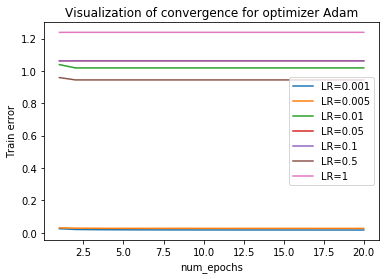

Epoch [1/20], Loss: 0.3465
Epoch [2/20], Loss: 0.0218
Epoch [3/20], Loss: 0.0204
Epoch [4/20], Loss: 0.0198
Epoch [5/20], Loss: 0.0194
Epoch [6/20], Loss: 0.0191
Epoch [7/20], Loss: 0.0189
Epoch [8/20], Loss: 0.0188
Epoch [9/20], Loss: 0.0187
Epoch [10/20], Loss: 0.0186
Epoch [11/20], Loss: 0.0185
Epoch [12/20], Loss: 0.0184
Epoch [13/20], Loss: 0.0184
Epoch [14/20], Loss: 0.0183
Epoch [15/20], Loss: 0.0182
Epoch [16/20], Loss: 0.0182
Epoch [17/20], Loss: 0.0181
Epoch [18/20], Loss: 0.0181
Epoch [19/20], Loss: 0.0180
Epoch [20/20], Loss: 0.0180
Accuracy of the model : 97.03 %
Epoch [1/20], Loss: 1.0942
Epoch [2/20], Loss: 1.0945
Epoch [3/20], Loss: 1.0945
Epoch [4/20], Loss: 1.0945
Epoch [5/20], Loss: 1.0945
Epoch [6/20], Loss: 1.0945
Epoch [7/20], Loss: 1.0945
Epoch [8/20], Loss: 1.0945
Epoch [9/20], Loss: 1.0945
Epoch [10/20], Loss: 1.0945
Epoch [11/20], Loss: 1.0945
Epoch [12/20], Loss: 1.0945
Epoch [13/20], Loss: 1.0945
Epoch [14/20], Loss: 1.0945
Epoch [15/20], Loss: 1.0945
Epoch 

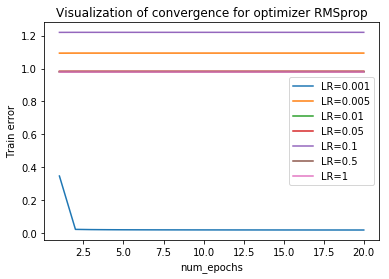

Epoch [1/20], Loss: 0.0398
Epoch [2/20], Loss: 0.0315
Epoch [3/20], Loss: 0.0289
Epoch [4/20], Loss: 0.0275
Epoch [5/20], Loss: 0.0265
Epoch [6/20], Loss: 0.0259
Epoch [7/20], Loss: 0.0254
Epoch [8/20], Loss: 0.0250
Epoch [9/20], Loss: 0.0246
Epoch [10/20], Loss: 0.0243
Epoch [11/20], Loss: 0.0241
Epoch [12/20], Loss: 0.0239
Epoch [13/20], Loss: 0.0237
Epoch [14/20], Loss: 0.0235
Epoch [15/20], Loss: 0.0234
Epoch [16/20], Loss: 0.0232
Epoch [17/20], Loss: 0.0231
Epoch [18/20], Loss: 0.0230
Epoch [19/20], Loss: 0.0229
Epoch [20/20], Loss: 0.0228
Accuracy of the model : 95.49 %
Epoch [1/20], Loss: 0.0305
Epoch [2/20], Loss: 0.0232
Epoch [3/20], Loss: 0.0219
Epoch [4/20], Loss: 0.0211
Epoch [5/20], Loss: 0.0206
Epoch [6/20], Loss: 0.0203
Epoch [7/20], Loss: 0.0200
Epoch [8/20], Loss: 0.0198
Epoch [9/20], Loss: 0.0195
Epoch [10/20], Loss: 0.0194
Epoch [11/20], Loss: 0.0192
Epoch [12/20], Loss: 0.0191
Epoch [13/20], Loss: 0.0190
Epoch [14/20], Loss: 0.0188
Epoch [15/20], Loss: 0.0187
Epoch 

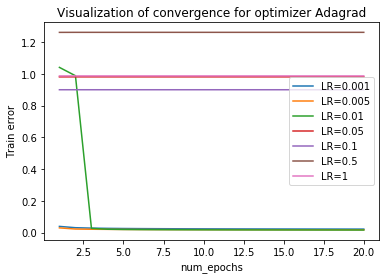

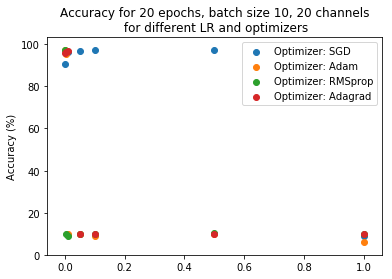

In [17]:
import numpy as np 

# Choose the hyperparameters for training: 
num_epochs = 20
batch_size=10

optimizers_names=['SGD','Adam','RMSprop','Adagrad']
optimizers=[torch.optim.SGD,torch.optim.Adam,torch.optim.RMSprop,torch.optim.Adagrad]
learning_rates=[0.001,0.005,0.01,0.05,0.1,0.5,1]

acc=[]

for i in range(len(optimizers)):
    acc_mod=[]
    for learning_rate in learning_rates:

        model=Model_3(20,3,torch.tanh)
        
        criterion = nn.MSELoss()

        # Use SGD optimizer with a learning rate of 0.01
        # It is initialized on our model
        opti=optimizers[i]
        optimizer = opti(model.parameters(), lr=learning_rate)

        train_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set)

        # plot the training error wrt. the number of epochs: 
        plt.plot(range(1, num_epochs+1), train_error, label="LR="+str(learning_rate))
        plt.xlabel("num_epochs")
        plt.ylabel("Train error")
        plt.title("Visualization of convergence for optimizer "+str(optimizers_names[i]))


        model.eval()
        acc_mod.append(accuracy(val_set, model))
    plt.legend()
    plt.show()
    
    acc.append(acc_mod)

# Figure for the accuracy
for i in range(len(acc)):
    plt.scatter(learning_rates,acc[i],label="Optimizer: "+str(optimizers_names[i]))
    
plt.title("Accuracy for 20 epochs, batch size 10, 20 channels\n for different LR and optimizers")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

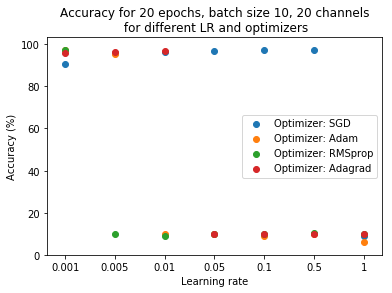

In [20]:
# Figure for the accuracy
for i in range(len(acc)):
    plt.scatter(np.arange(len(learning_rates)),acc[i],label="Optimizer: "+str(optimizers_names[i]))
    
plt.title("Accuracy for 20 epochs, batch size 10, 20 channels\n for different LR and optimizers")
plt.ylabel("Accuracy (%)")
plt.xlabel('Learning rate')
plt.xticks(np.arange(len(learning_rates)), learning_rates)
plt.legend()
plt.show()

### Changing to the Cross Entropy Loss

We have to remove the last activation function in the model and the one hot encoding in the training

In [29]:
class Model_3_CE(nn.Module):
    
    def __init__(self,out_channels,kernel,acti):
        super(Model_3_CE, self).__init__()
        self.l1 = nn.Conv2d(1,out_channels, kernel_size=kernel, padding=2)
        self.maxpool=nn.MaxPool2d(2)
            
        self.l2 = nn.Conv2d(out_channels,out_channels, kernel_size=kernel, padding=2)
        
        self.l3 = nn.Conv2d(out_channels,out_channels, kernel_size=kernel, padding=2)
        
        if kernel==3:
            coeff=10
        
        self.linear = nn.Linear(out_channels*(coeff**2),10)
        
        self.acti=acti
        
    def forward(self, inputs):
        #inputs = inputs.view(batch_size, -1)
        inputs = self.l1(inputs)
        inputs = self.l2(self.maxpool(inputs))

        inputs = self.l3(self.maxpool(inputs))
        
        inputs = torch.flatten(inputs, 1)
        outputs = self.linear(inputs)
        #outputs = self.acti(outputs)# Use softmax as the activation function for the last layer
        
        return outputs

In [65]:
# define a function for training
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
    train_error = []
    train_loader = DataLoader(dataset, batch_size, shuffle=True)
    model.train()
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        for (images, labels) in train_loader:
            #print(images.shape,images.view(batch_size, -1).shape)
            
            y_pre = model(images) 
            #reshape the inputs from [N, img_shape, img_shape] to [N, img_shape*img_shape] 
            
            
            loss = criterion(y_pre, labels)
            if math.isnan(loss.item()):
                print(y_pre)
            
            optimizer.zero_grad()
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
            
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(dataset)
        train_error.append(epoch_average_loss)
        print('Epoch [{}/{}], Loss: {:.4f}'
                      .format(epoch+1, num_epochs, epoch_average_loss))
    return train_error

Epoch [1/50], Loss: 0.2291
Epoch [2/50], Loss: 0.0827
Epoch [3/50], Loss: 0.0645
Epoch [4/50], Loss: 0.0570
Epoch [5/50], Loss: 0.0507
Epoch [6/50], Loss: 0.0454
Epoch [7/50], Loss: 0.0414
Epoch [8/50], Loss: 0.0382
Epoch [9/50], Loss: 0.0350
Epoch [10/50], Loss: 0.0319
Epoch [11/50], Loss: 0.0305
Epoch [12/50], Loss: 0.0284
Epoch [13/50], Loss: 0.0268
Epoch [14/50], Loss: 0.0249
Epoch [15/50], Loss: 0.0216
Epoch [16/50], Loss: 0.0209
Epoch [17/50], Loss: 0.0190
Epoch [18/50], Loss: 0.0202
Epoch [19/50], Loss: 0.0182
Epoch [20/50], Loss: 0.0175
Epoch [21/50], Loss: 0.0166
Epoch [22/50], Loss: 0.0174
Epoch [23/50], Loss: 0.0146
Epoch [24/50], Loss: 0.0152
Epoch [25/50], Loss: 0.0167
Epoch [26/50], Loss: 0.0120
Epoch [27/50], Loss: 0.0137
Epoch [28/50], Loss: 0.0137
Epoch [29/50], Loss: 0.0141
Epoch [30/50], Loss: 0.0171
Epoch [31/50], Loss: 0.0125
Epoch [32/50], Loss: 0.0140
Epoch [33/50], Loss: 0.0108
Epoch [34/50], Loss: 0.0104
Epoch [35/50], Loss: 0.0141
Epoch [36/50], Loss: 0.0127
E

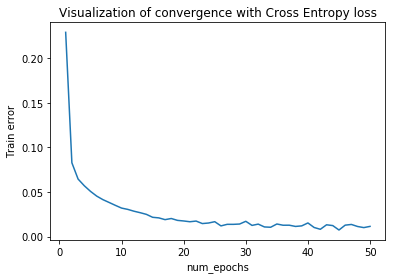

Accuracy of the model : 98.21 %


98.21

In [70]:
import math

# Choose the hyperparameters for training: 
num_epochs = 50
batch_size=10
learning_rate=0.025


model=Model_3_CE(20,3,torch.tanh)

criterion = nn.CrossEntropyLoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set)

# plot the training error wrt. the number of epochs: 
plt.plot(range(1, num_epochs+1), train_error)
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence with Cross Entropy loss")
plt.show()

model.eval()
accuracy(val_set, model)


### Evaluate the Model on validation set

Text(0.5,1,'Prediction label: 2')

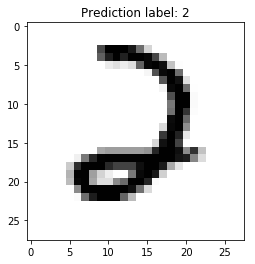

In [71]:
val_index = 66

(image, label) = val_set[val_index]
output = model(image.unsqueeze(0))
_, prediction = torch.max(output.data, 1)

plt.imshow(image.view(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Prediction label: %d" % prediction)

### Exercise 1: Impact of the architecture of the model
Define your own class `Model` to improve the predictions:

* The convolutional layer can be a good choice to deal with images. Replace nn.Linear with [nn.Conv2d](https://pytorch.org/docs/stable/nn.html#conv2d).
* Try to add more layers (1, 2, 3, more ?)
* Change the number of neurons in hidden layers (5, 10, 20, more ?)
* Try different activation functions such as [sigmoid](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.sigmoid), [tanh](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.tanh), [relu](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu), etc.

### Exercise 2: Impact of the optimizer
Retrain the model by using different parameters of the optimizer; you can change its parameters in the cell initializing it, after the definition of your model.

* Use different batch sizes, from 10 to 1 000 for instance
* Try different values of the learning rate (between 0.001 and 10), and see how these impact the training process. Do all network architectures react the same way to different learning rates?
* Change the duration of the training by increasing the number of epochs
* Try other optimizers, such as [Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) or [RMSprop](https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop)

### Exercise 3: Impact of the loss function
The MSE error is rarely used in this case. The cross entropy loss can be a better choice for multi-classification problems. In pytorch, the cross entropy loss is defined by [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#crossentropyloss). Replace the MSE loss by this one to observe its impact.

**Note:** In order to use nn.CrossEntropyLoss correctly, don't add an activation function to the last layer of your network. And one-hot encoding is no longer needed to calculate the loss, delete the encoding procedures in function `train`.   

### Exercise 4: Prediction on test set

Once you have a model that seems satisfying on the validation dataset, you SHOULD evaluate it on a test dataset that has never been used before, to obtain a final accuracy value.

In [72]:
# Loading MNIST test set from torchvision.dataset
test_set = torchvision.datasets.MNIST(root='data/',
                                         train=False,
                                         transform=transforms.ToTensor(),
                                         download=False)

In [73]:
accuracy(test_set, model)

Accuracy of the model : 98.39 %


98.39